In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler

In [2]:
df = pd.read_csv('../data/diamonds_train.csv')
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(5)

,carat,cut,color,clarity,depth,table,x,y,z,city,price
0,1.21,Premium,J,VS2,62.4,58.0,6.83,6.79,4.25,Dubai,4268
1,0.32,Very Good,H,VS2,63.0,57.0,4.35,4.38,2.75,Kimberly,505
2,0.71,Fair,G,VS1,65.5,55.0,5.62,5.53,3.65,Las Vegas,2686
3,0.41,Good,D,SI1,63.8,56.0,4.68,4.72,3.00,Kimberly,738
4,1.02,Ideal,G,SI1,60.5,59.0,6.55,6.51,3.95,Dubai,4882


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    40455 non-null  float64
 1   cut      40455 non-null  object 
 2   color    40455 non-null  object 
 3   clarity  40455 non-null  object 
 4   depth    40455 non-null  float64
 5   table    40455 non-null  float64
 6   x        40455 non-null  float64
 7   y        40455 non-null  float64
 8   z        40455 non-null  float64
 9   city     40455 non-null  object 
 10  price    40455 non-null  int64  
dtypes: float64(6), int64(1), object(4)
memory usage: 3.4+ MB


In [4]:
df.describe()

,carat,depth,table,x,y,z,price
count,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000,40455.000000
mean,0.797706,61.752841,57.446133,5.729392,5.732819,3.537154,3928.444469
std,0.475544,1.431725,2.233535,1.124453,1.146650,0.697062,3992.416147
min,0.200000,43.000000,43.000000,0.000000,0.000000,0.000000,326.000000
25%,0.400000,61.000000,56.000000,4.710000,4.720000,2.910000,945.000000
50%,0.700000,61.800000,57.000000,5.690000,5.710000,3.520000,2397.000000
75%,1.040000,62.500000,59.000000,6.540000,6.540000,4.035000,5331.000000
max,4.500000,79.000000,95.000000,10.230000,58.900000,8.060000,18823.000000


In [5]:
df_corr = df.corr(numeric_only=True)

In [6]:
df_corr

,carat,depth,table,x,y,z,price
carat,1.000000,0.026528,0.183392,0.975688,0.951667,0.967570,0.921935
depth,0.026528,1.000000,-0.293114,-0.026348,-0.030966,0.094655,-0.014864
table,0.183392,-0.293114,1.000000,0.196059,0.184673,0.155189,0.130111
x,0.975688,-0.026348,0.196059,1.000000,0.973712,0.984876,0.885848
y,0.951667,-0.030966,0.184673,0.973712,1.000000,0.964828,0.866163
z,0.967570,0.094655,0.155189,0.984876,0.964828,1.000000,0.874500
price,0.921935,-0.014864,0.130111,0.885848,0.866163,0.874500,1.000000


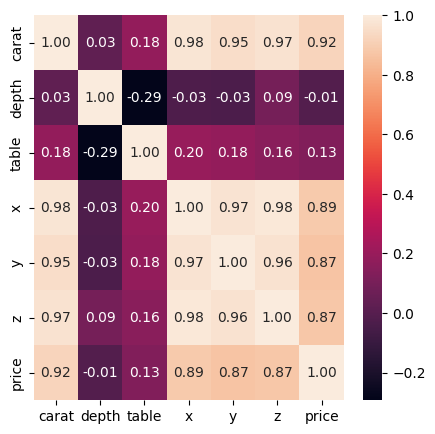

In [7]:
fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(1, 1, 1)
sns.heatmap(df_corr, annot=True, fmt='.2f', ax=ax);

In [8]:
def aggregator(data, col):
    #data: data frame to aggregate
    #col: col to aggregate
    
    output = data.groupby(by=col).sum(numeric_only=False)[['carat', 'price']]
    output['price/carat'] = output['price'] / output['carat']
    
    #add scaled columns
    
    scaler = StandardScaler()
    output['std_scaler'] = scaler.fit_transform(output[['price/carat']])
    
    scaler_2 = MinMaxScaler()
    output['minmax_scaler'] = scaler_2.fit_transform(output[['price/carat']])
    
    scaler_3 = RobustScaler()
    output['robust_scaler'] = scaler_3.fit_transform(output[['price/carat']])
    
    output = output.sort_values('price/carat', ascending=False)
    
    return output

In [9]:
agg_color = aggregator(df, 'color')

In [10]:
agg_color

,carat,price,price/carat,std_scaler,minmax_scaler,robust_scaler
color,,,,,,
G,6547.40,34016282,5195.387788,1.629580,1.000000,1.119120
F,5250.00,26392382,5027.120381,0.756555,0.725164,0.442011
I,4140.02,20526383,4958.039575,0.398142,0.612332,0.164029
H,5714.30,28098796,4917.277007,0.186653,0.545754,0.000000
D,3297.18,15828328,4800.565332,-0.418883,0.355125,-0.469649
E,4825.97,22622109,4687.577627,-1.005099,0.170579,-0.924312
J,2496.31,11440941,4583.141116,-1.546949,0.000000,-1.344565


In [11]:
agg_cut = aggregator(df, 'cut')
agg_cut

,carat,price,price/carat,std_scaler,minmax_scaler,robust_scaler
cut,,,,,,
Premium,9194.24,47373730,5152.544419,1.149161,1.000000,0.706438
Very Good,7349.27,36329472,4943.276271,0.556306,0.793824,0.105902
Ideal,11359.46,55733746,4906.372838,0.451759,0.757466,0.000000
Good,3093.64,14214681,4594.807735,-0.430903,0.450505,-0.894098
Fair,1274.57,5273592,4137.545996,-1.726322,0.000000,-2.206302


In [12]:
agg_clarity = aggregator(df, 'clarity')
agg_clarity

,carat,price,price/carat,std_scaler,minmax_scaler,robust_scaler
clarity,,,,,,
IF,663.30,3712810,5597.482286,0.965854,1.000000,0.841279
VVS2,2248.16,12312479,5476.691606,0.804716,0.952477,0.641062
VS1,4376.94,23031471,5262.002906,0.518314,0.868012,0.285204
VS2,7053.09,36192882,5131.493005,0.344209,0.816666,0.068878
VVS1,1406.40,7100049,5048.385239,0.233341,0.783969,-0.068878
SI2,7493.52,35345136,4716.760081,-0.209058,0.653497,-0.618563
SI1,8298.10,38994605,4699.220906,-0.232456,0.646597,-0.647635
I1,731.67,2235789,3055.734142,-2.424921,0.000000,-3.371798


In [13]:
test = df.groupby(by=['cut', 'color', 'clarity']).sum(numeric_only=False)[['carat', 'price']]
test['price/carat'] = test['price'] / test['carat']

In [14]:
test2 = test.reset_index()

In [15]:
scaler = StandardScaler()
test2['std_scaler'] = scaler.fit_transform(test2[['price/carat']])
    
scaler_2 = MinMaxScaler()
test2['minmax_scaler'] = scaler_2.fit_transform(test2[['price/carat']])
    
scaler_3 = RobustScaler()
test2['robust_scaler'] = scaler_3.fit_transform(test2[['price/carat']])

In [16]:
test

carat   price  price/carat
cut       color clarity                             
Fair      D     I1         7.51   29532  3932.356858
                IF         1.14    4859  4262.280702
                SI1       39.24  182108  4640.876656
                SI2       48.10  209164  4348.523909
                VS1        2.44   11859  4860.245902
...                         ...     ...          ...
Very Good J     SI2      126.95  570434  4493.375345
                VS1       85.50  379512  4438.736842
                VS2      162.71  773026  4750.943396
                VVS1       6.23   26420  4240.770465
                VVS2      26.16  143563  5487.882263

[273 rows x 3 columns]

In [17]:
test2.sort_values('price/carat', ascending=False)

,cut,color,clarity,carat,price,price/carat,std_scaler,minmax_scaler,robust_scaler
51,Good,D,IF,5.07,68013,13414.792899,6.303807,1.000000,8.015499
162,Premium,D,IF,5.46,71953,13178.205128,6.130338,0.979323,7.797167
218,Very Good,D,IF,13.74,164120,11944.687045,5.225909,0.871515,6.658830
106,Ideal,D,IF,12.67,129408,10213.733228,3.956753,0.720232,5.061440
170,Premium,E,IF,9.36,76031,8122.970085,2.423781,0.537502,3.132005
...,...,...,...,...,...,...,...,...,...
38,Fair,I,I1,39.45,105484,2673.865653,-1.571565,0.061258,-1.896635
66,Good,F,I1,14.20,36172,2547.323944,-1.664347,0.050198,-2.013412
266,Very Good,J,IF,3.26,7766,2382.208589,-1.785412,0.035767,-2.165787
15,Fair,F,I1,26.96,63717,2363.390208,-1.799209,0.034122,-2.183153


In [18]:
df['city'].value_counts()

Surat            5073
Antwerp          5047
Kimberly         4976
Luxembourg       2606
Las Vegas        2586
New York City    2586
Dubai            2561
Madrid           2540
Paris            2530
Tel Aviv         2505
Zurich           2497
Amsterdam        2485
London           2463
Name: city, dtype: int64

In [19]:
test3 = df[df['city'] == 'Surat'].groupby(by=['cut', 'color', 'clarity']).sum(numeric_only=False)[['carat', 'price']]
test3['price/carat'] = test['price'] / test['carat']

In [20]:
test3.reset_index().sort_values('price/carat', ascending=False).head(20)

,cut,color,clarity,carat,price,price/carat
39,Good,D,IF,1.46,18067,13414.792899
196,Very Good,D,IF,2.44,24215,11944.687045
88,Ideal,D,IF,3.80,44106,10213.733228
149,Premium,E,IF,0.32,967,8122.970085
204,Very Good,E,IF,4.97,40981,7838.027543
211,Very Good,F,IF,3.89,25728,7134.186133
96,Ideal,E,IF,2.66,20476,6949.600639
4,Fair,D,VVS2,0.41,1089,6882.494005
201,Very Good,D,VVS1,2.08,21300,6829.431818
147,Premium,D,VVS1,1.13,3880,6737.946149


<Axes: ylabel='Frequency'>

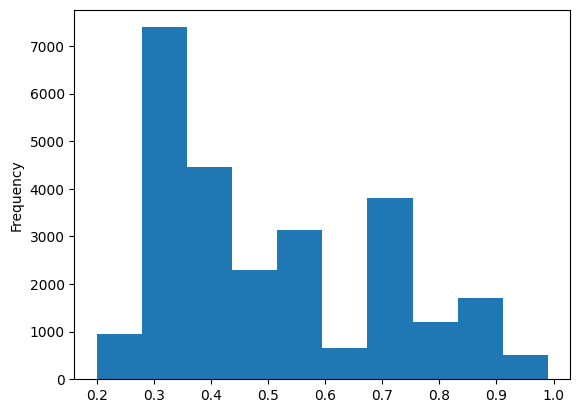

In [82]:
df[df['carat'] < 1]['carat'].plot.hist()

In [116]:
small = df[df['carat'] == 0.31].reset_index().drop(columns='index')

In [117]:
small

,carat,cut,color,clarity,depth,table,x,y,z,city,price
0,0.31,Ideal,H,VS1,61.8,54.2,4.33,4.37,2.69,Zurich,557
1,0.31,Ideal,G,VS1,62.1,55.0,4.33,4.37,2.70,Antwerp,625
2,0.31,Ideal,I,VS1,61.3,55.6,4.37,4.40,2.69,Surat,513
3,0.31,Ideal,E,VVS2,60.8,57.0,4.36,4.39,2.66,Zurich,816
4,0.31,Ideal,D,SI2,62.1,57.0,4.34,4.32,2.69,Surat,593
...,...,...,...,...,...,...,...,...,...,...,...
1712,0.31,Very Good,I,VS2,63.1,54.0,4.34,4.31,2.73,Luxembourg,558
1713,0.31,Very Good,I,SI1,62.8,60.0,4.29,4.31,2.70,Dubai,418
1714,0.31,Ideal,F,VS2,62.1,57.0,4.34,4.36,2.70,Amsterdam,625
1715,0.31,Very Good,G,VS1,63.0,57.0,4.28,4.32,2.71,Kimberly,625


In [102]:
small['color'].value_counts(), small['cut'].value_counts(), small['clarity'].value_counts()

(G    760
 E    572
 D    498
 H    485
 F    471
 I    267
 J     59
 Name: color, dtype: int64,
 Ideal        1742
 Premium       697
 Very Good     457
 Good          207
 Fair            9
 Name: cut, dtype: int64,
 VS2     874
 SI1     541
 VS1     465
 VVS1    428
 VVS2    386
 IF      268
 SI2     145
 I1        5
 Name: clarity, dtype: int64)

In [87]:
small[small['cut'] == 'Ideal']['color'].value_counts()

G    1175
E    1105
F     932
D     872
H     596
I     377
J     129
Name: color, dtype: int64

In [95]:
small[small['carat'] == .31]['cut'].value_counts()

Ideal        923
Premium      391
Very Good    264
Good         133
Fair           6
Name: cut, dtype: int64

In [97]:
small[small['carat'] == .31]['color'].value_counts()

G    408
E    328
D    270
H    269
F    267
I    143
J     32
Name: color, dtype: int64

In [120]:
small[small['carat'] == .31]['clarity'].value_counts()

VS2     462
SI1     311
VS1     258
VVS1    243
VVS2    212
IF      163
SI2      67
I1        1
Name: clarity, dtype: int64

In [119]:
xxx = small.groupby(['cut', 'color', 'clarity'])[['price', 'carat']].sum().reset_index()
xxx['p_x_c'] = xxx['price'] / xxx['carat']
xxx[xxx['cut'] == 'Ideal']

,cut,color,clarity,price,carat,p_x_c
38,Ideal,D,IF,2561,0.62,4130.645161
39,Ideal,D,SI1,29464,14.26,2066.199158
40,Ideal,D,SI2,5406,3.10,1743.870968
41,Ideal,D,VS1,12960,5.27,2459.203036
42,Ideal,D,VS2,67998,25.42,2674.980330
43,Ideal,D,VVS1,1933,0.62,3117.741935
44,Ideal,D,VVS2,21035,7.44,2827.284946
45,Ideal,E,IF,13314,3.72,3579.032258
46,Ideal,E,SI1,9395,4.96,1894.153226
47,Ideal,E,SI2,2979,1.86,1601.612903
